## Predicting who is going to get churned from the existing credit card services

In [322]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing data set

In [323]:
dt = pd.read_csv('BankChurners_new.csv')
dt.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [324]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           9015 non-null   object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* Looking at the data we see that the dataset contains both numeric and categorical datatypes. The data is for each customer with a client number (CLIENTNUM), attrition identifier, demographic data and product data. Let's see what are the types of variables in our dataset:



* Categorical Variables:-



* Attrition_Flag: flag to indicate if the customer is an existing customer or has attrited
* Gender: M=Male, F=Female
* Education_Level: Educational Qualification of the account holder ( high school, college graduate, post graduate, uneducated, doctrate)
* Marital_Status: Demographic variable - Married, Single, Unknown
* Income_Category: Demographic variable - Annual Income Category of the account holder (< 40K,40K - 60K, 60K−80K, 80K−120K, > $120K, Unknown)
* Card_Category: Type of Card (Blue, Silver, Gold, Platinum)





* Numerical Variables:-

* Clientnum: Unique identifier for the customer holding the account
* Customer_Age: Customer's Age in Years
* Dependent_count: Number of dependents for the customer
* Months_on_book: Time period (month) of customer relationship  with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts by the bank with the customer in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


## Exploratory Data Analysis (EDA)

## 1.Univariate Analysis

### 1.1 Analysis of Numerical features

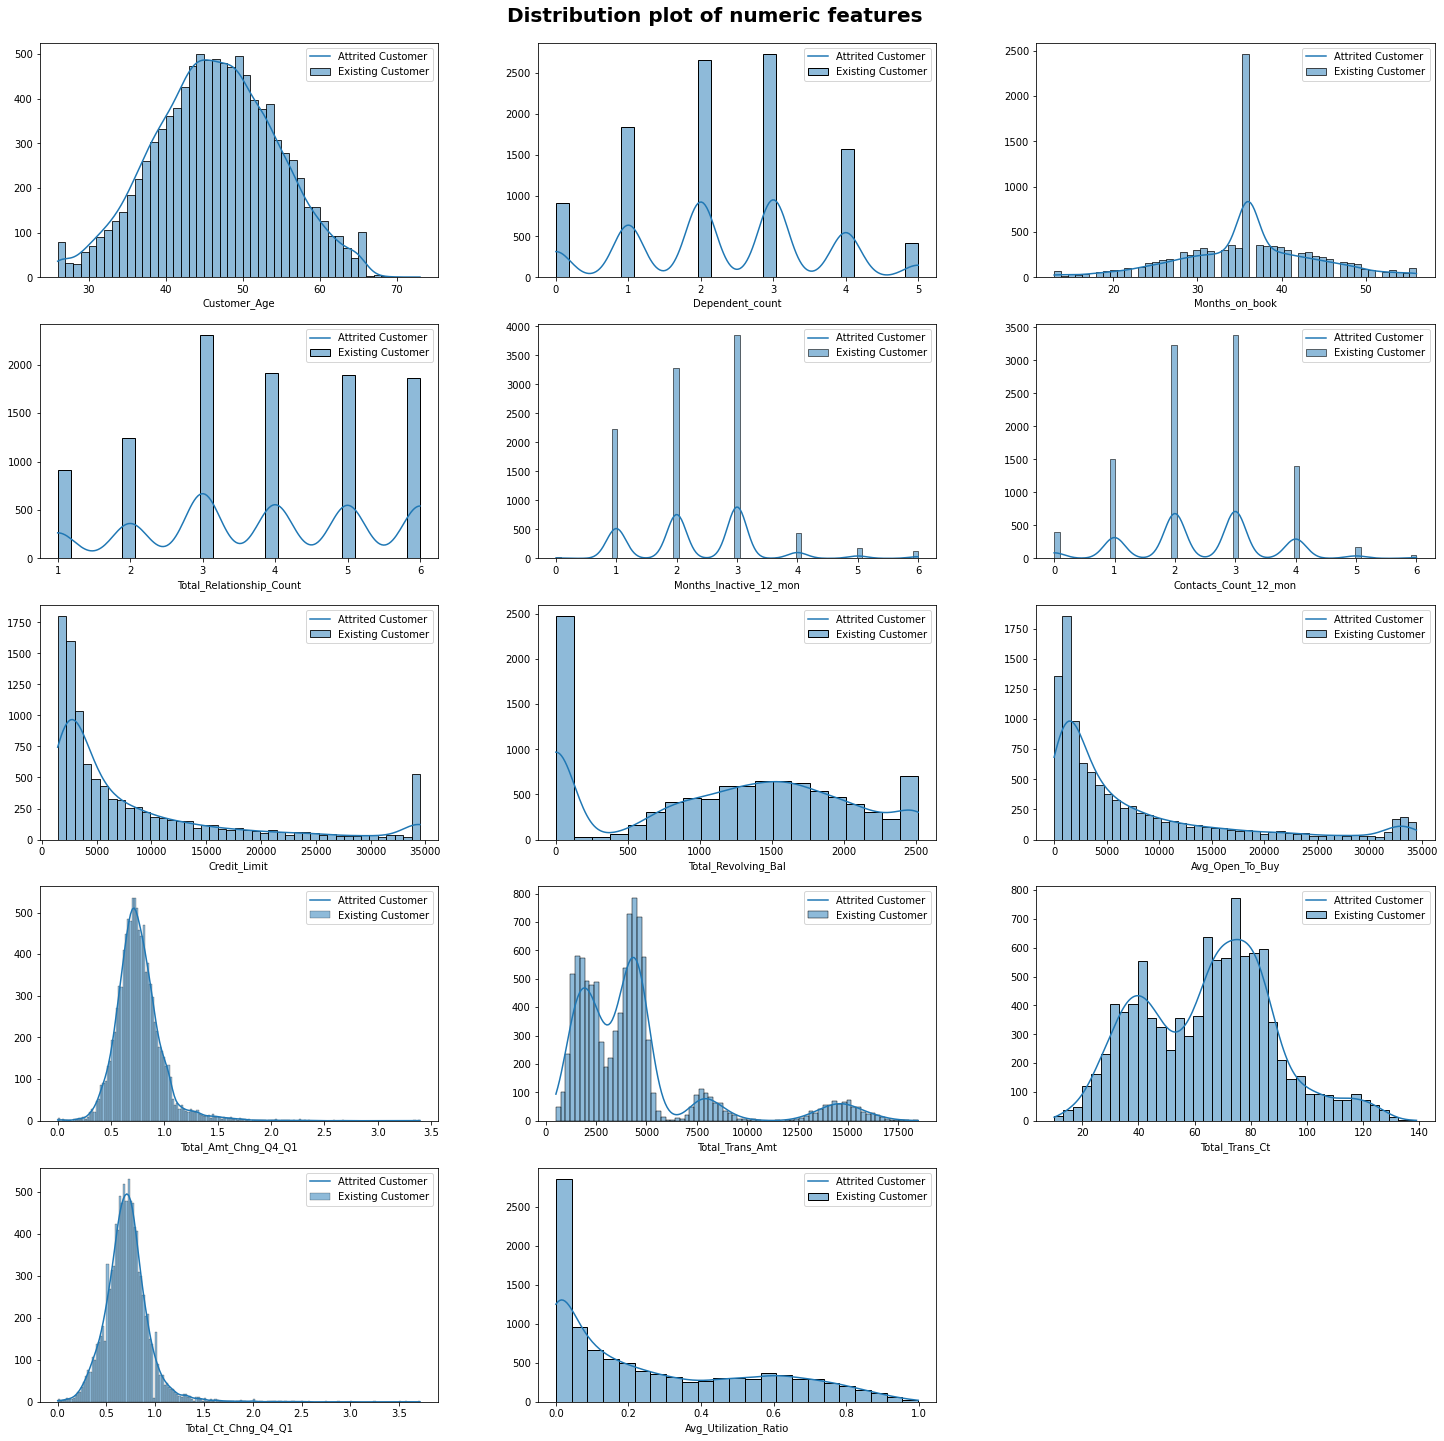

In [325]:
col_num=dt.select_dtypes(include=["int64","float64"]).columns.tolist()
fig,axs=plt.subplots(5,3,figsize=(25,25))
fig.suptitle("Distribution plot of numeric features",y=0.9,fontweight="bold",fontsize=20)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.histplot(x=col,ax=ax,data=dt,kde=True)
    b.legend(labels=["Attrited Customer","Existing Customer"])
    b.set_ylabel("")
    plt.subplots_adjust(wspace=.25)
fig.delaxes(axs[4,2])

**Analysis:**

* Customer age, Month on book (time of relationship),Total_Amt_Chng_Q4_Q1(Change in Transaction Amount (Q4 over Q1), Total_Ct_Chng_Q4_Q1(Change in Transaction Count (Q4 over Q1) are normally distributed.
* Most of the customers are from around 30 - 60 age group(Bread winners).
* Most of the customers belongs to nuclear families.
* The average time of relationship of credit card customers is 35 months.
* On an average 3 to 4 products of the bank is used by above 1500 customers.
* While observing the inactive status of the credit card customers, we can see that there are customers who are inactive for the past 5 to 6 months.
* There are customers who were not using the products for past 2 to 3 months (High priority groups)

### 1.2 Analysis of Target 

In [326]:
dt['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

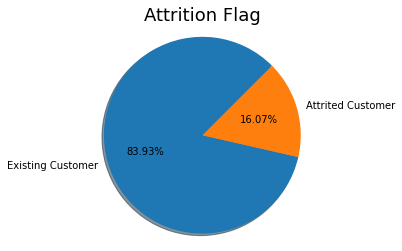

In [327]:
fig, ax = plt.subplots()
ax.pie(dt['Attrition_Flag'].value_counts().values, labels = dt['Attrition_Flag'].value_counts().index, autopct = '%1.2f%%', shadow = True, startangle = 45)
ax.axis('equal')
plt.title('Attrition Flag', loc = 'center', fontsize = 18)
plt.show()

**Observation:**
* Around 16% credit customers of the bank are already attrited.
* Here we are having an unbalanced dataset as the attrited customer percentage is very much lesser when compared to existing customers


## 2.Bi-variate Analysis

### 2.1. Attrition rate with respect to Gender

In [328]:
dt['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

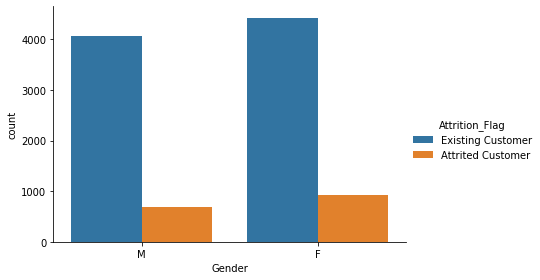

In [329]:
sns.catplot(x='Gender',hue='Attrition_Flag',data=dt,kind='count',height=4,aspect=1.5)
plt.show()

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848


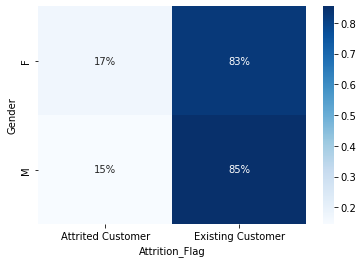

In [330]:
gender_matrix = pd.crosstab(dt['Gender'], dt['Attrition_Flag'], 
            normalize='index')
display(gender_matrix)
sns.heatmap(gender_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.show()

**Findings:**

* More attrition rate is among the female customers, around 2% ie, almost 200 customers more than male customers.



## 2.2 Analysis of card category feature

### 2.2.1. Attrition rate 

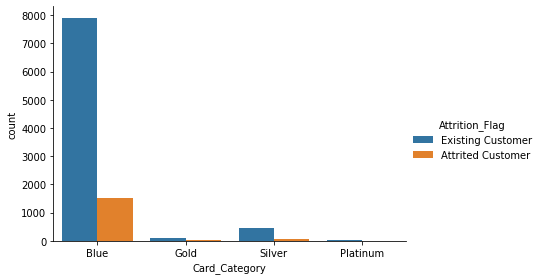

In [331]:
sns.catplot(x='Card_Category',hue='Attrition_Flag',data=dt,kind='count',height=4,aspect=1.5)
plt.show()

In [332]:
card_matrix = pd.crosstab(dt['Card_Category'],dt['Attrition_Flag'],
            margins = True,  
            margins_name = "% all")
display(card_matrix)

Attrition_Flag,Attrited Customer,Existing Customer,% all
Card_Category,,,
Blue,1519,7917,9436
Gold,21,95,116
Platinum,5,15,20
Silver,82,473,555
% all,1627,8500,10127


Attrition_Flag,Attrited Customer,Existing Customer,% all
Card_Category,,,
Blue,0.149995,0.781772,0.931767
Gold,0.002074,0.009381,0.011455
Platinum,0.000494,0.001481,0.001975
Silver,0.008097,0.046707,0.054804
% all,0.160660,0.839340,1.000000


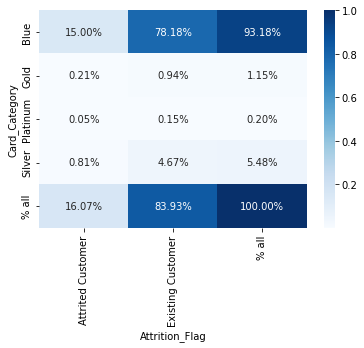

In [333]:
card_matrix = pd.crosstab(dt['Card_Category'],dt['Attrition_Flag'],
            margins = True,  
            margins_name = "% all",
            normalize='all')
display(card_matrix)
sns.heatmap(card_matrix, annot=True, fmt='.02%', cmap='Blues')
plt.show()

**Findings:**

* Majority of the credit card customers are fall under Blue card category (93%, ie,9418 customers).
* Very few belongs to platinum and gold card category.
* 15% of the blue card customers are churned.
* All card categories are facing attrition issue.

###  2.2.2 With respect to Months inactive

In [334]:
card_matrix = pd.crosstab(dt['Card_Category'],dt['Months_Inactive_12_mon'],
            margins = True,  
            margins_name = "% all")
display(card_matrix)

Months_Inactive_12_mon,0,1,2,3,4,5,6,% all
Card_Category,,,,,,,,
Blue,26,2084,3034,3592,413,168,119,9436
Gold,0,31,33,43,5,2,2,116
Platinum,0,4,8,7,1,0,0,20
Silver,3,114,207,204,16,8,3,555
% all,29,2233,3282,3846,435,178,124,10127


Months_Inactive_12_mon,0,1,2,3,4,5,6,% all
Attrition_Flag,,,,,,,,
Attrited Customer,0.001481,0.009875,0.049867,0.081564,0.012837,0.003160,0.001876,0.16066
Existing Customer,0.001382,0.210625,0.274217,0.298213,0.030118,0.014417,0.010368,0.83934
% all,0.002864,0.220500,0.324084,0.379777,0.042954,0.017577,0.012244,1.00000


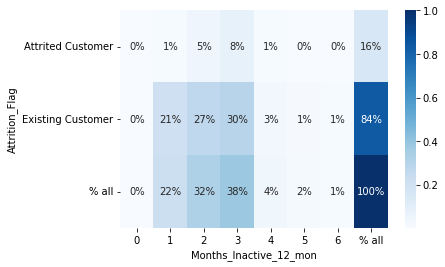

In [335]:
card_matrix = pd.crosstab(dt['Attrition_Flag'],dt['Months_Inactive_12_mon'],
            margins = True,  margins_name = "% all", 
            normalize='all')
display(card_matrix)
sns.heatmap(card_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.show()

**Findings:**
* We can split the inactive status to 2 categories: High risk & Low risk
* For all card category above two months of inactive state can be considered as high risk
* Card category below two months of inactive state can be considered as Low risk
* There is a large variation in the count of credit card customers who are inactive between 3 to 4 months
* Around two third of the blue credit card customers falls under high risk category.
* The same trend can be observed in all other card categories.

### 2.2.3 With respect to Gender & Attrition

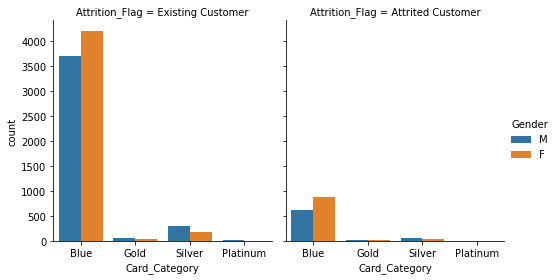

In [336]:
sns.catplot(x="Card_Category", hue="Gender",col="Attrition_Flag",
                data=dt, kind="count",
                height=4, aspect=.9);

**Findings:**
* In the blue card category more female customers are attrited than that of males.
* Similar trend is observed in the case of existing customers too
* In Gold card category of existing customers, males are more than females.
* In Attrited customers both genders show equal attrition rate in gold card category.
* In Silver card category more males customers are atrrited than females.
* Similar trend is observed for existing customers too.
* We want to consider females as the high priority group and want to conduct more promotions & campigns among them.

### 2.3. Attrition rate with respect to contact count

Contacts_Count_12_mon,0,1,2,3,4,5,6,% all
Attrition_Flag,,,,,,,,
Attrited Customer,0.000691,0.010665,0.039795,0.067246,0.031105,0.005826,0.005332,0.16066
Existing Customer,0.038708,0.137356,0.278858,0.266515,0.106349,0.011553,0.000000,0.83934
% all,0.039400,0.148020,0.318653,0.333761,0.137454,0.017379,0.005332,1.00000


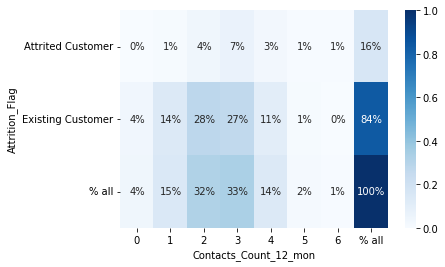

In [337]:
card_matrix = pd.crosstab(dt['Attrition_Flag'],dt['Contacts_Count_12_mon'],
            margins = True,  margins_name = "% all", 
            normalize='all')
display(card_matrix)
sns.heatmap(card_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.show()

**Findings:**
* High risk category : 2 to 4 contacts in an year.
* No customer remains after 3 to 4 contacts which should be taken care of.
* One time contact per year is advisable.

## 2.4 Attrition rate with respect to change from Q1 to Q4

Total_Ct_Chng_Q4_Q1,0.0,0.028,0.029,0.038,0.053,0.059,0.062,0.074,0.077,0.091,...,2.5,2.571,2.75,2.875,3.0,3.25,3.5,3.571,3.714,% all
Attrition_Flag,,,,,,,,,,,,,,,,,,,,,
Attrited Customer,7,0,1,1,1,2,0,1,3,3,...,1,0,0,0,0,0,0,0,0,1627
Existing Customer,0,1,0,0,0,0,1,0,0,0,...,2,1,1,1,2,1,1,1,1,8500
% all,7,1,1,1,1,2,1,1,3,3,...,3,1,1,1,2,1,1,1,1,10127


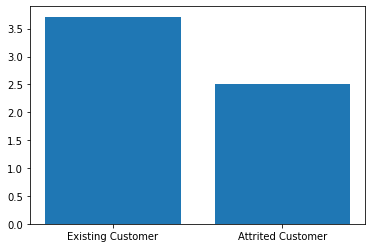

In [338]:
card_matrix = pd.crosstab(dt['Attrition_Flag'],dt['Total_Ct_Chng_Q4_Q1'],
            margins = True,  margins_name = "% all"
           )
display(card_matrix)
plt.bar(x = dt['Attrition_Flag'],height = dt['Total_Ct_Chng_Q4_Q1'])
plt.show()

**Findings:**
* More the percentage change of transaction count(means, more they closely connected with the bank), more will be chances of not being attrited.
* The percentage change of transaction count of around 2.5% can be considered as a buffer value.
* All the percent change below the buffer value can be considered as high risk group.
* High risk customers should be forced to do more transcations by offering new promotions


## 2.5 Attrition rate with respect to Education level

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,% all
Attrition_Flag,,,,,,,
Attrited Customer,0.017890,0.011036,0.056575,0.035548,0.010688,0.027533,0.15927
Existing Customer,0.099791,0.041357,0.306808,0.198304,0.049257,0.145214,0.84073
% all,0.117681,0.052393,0.363383,0.233852,0.059944,0.172746,1.00000


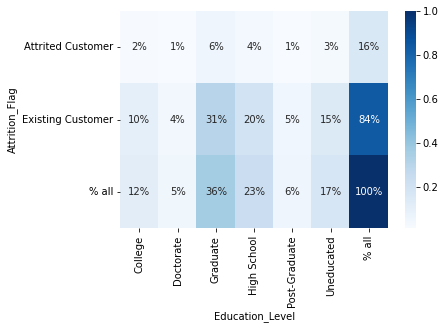

In [339]:
card_matrix = pd.crosstab(dt['Attrition_Flag'],dt['Education_Level'],
            margins = True,  margins_name = "% all", 
            normalize='all')
display(card_matrix)
sns.heatmap(card_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.show()

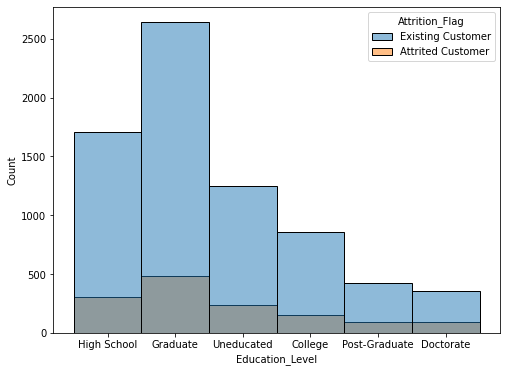

In [340]:
plt.figure(figsize=(8,6))
sns.histplot(x='Education_Level',hue = 'Attrition_Flag',data=dt)
plt.show()

**Findings:**
* The more customers belongs to graduate level(Category 1) and the attrition count is also comparitively high.
* More campaign & promotion is needed among uneducated & high school level customers (Category 2).
* Bank can earn more customers with the education level PG & Doctrate (Category 3).
* Bank must give more offers to Category 3 in order to attract them.

## 2.6 Attrition rate with respect to Marital status

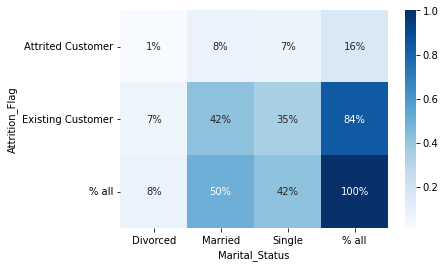

In [341]:
card_matrix = pd.crosstab(dt['Attrition_Flag'],dt['Marital_Status'],
            margins = True,  margins_name = "% all", 
            normalize='all')
sns.heatmap(card_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.show()

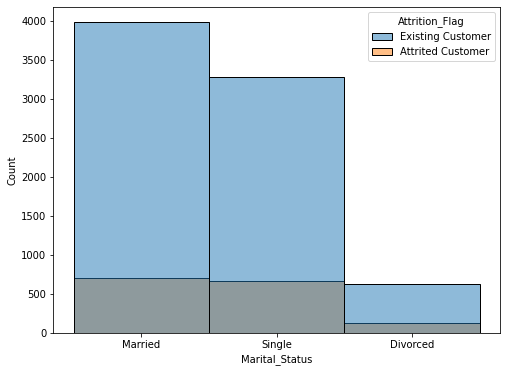

In [342]:
plt.figure(figsize=(8,6))
sns.histplot(x='Marital_Status',hue = 'Attrition_Flag',data=dt)
plt.show()

**Findings:**
* Majority of the customers belong to married group. So the bank needs to give more offers which are suitable for a family.
* Similar action must be taken for the customers who are single.

## 2.7 Attrition rate with respect to Income of customers

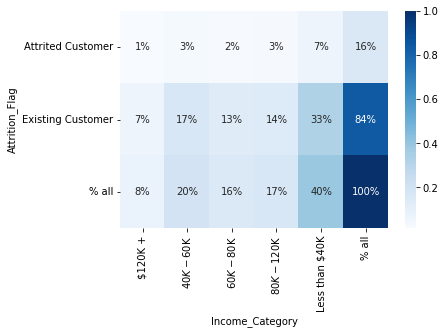

In [343]:
card_matrix = pd.crosstab(dt['Attrition_Flag'],dt['Income_Category'],
            margins = True,  margins_name = "% all", 
            normalize='all')
sns.heatmap(card_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.show()

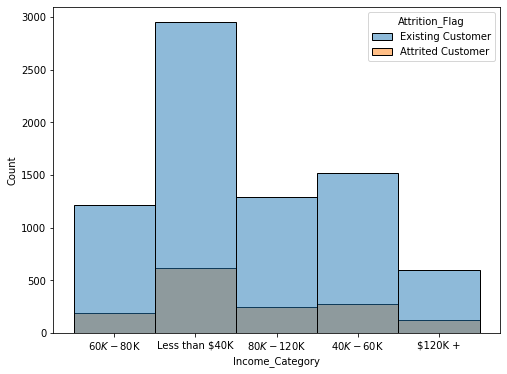

In [344]:
plt.figure(figsize=(8,6))
sns.histplot(x='Income_Category',hue = 'Attrition_Flag',data=dt)
plt.show()

In [345]:
dt_income_less_than_40K = dt[dt['Income_Category']=='Less than $40K']
dt_income_60_80 = dt[dt['Income_Category']=='$60K - $80K']
dt_income_80_120 = dt[dt['Income_Category']=='$80K - $120K']
dt_income_40_60 = dt[dt['Income_Category']=='$40K - $60K']
dt_income_120 = dt[dt['Income_Category']=='$120K +']

In [346]:
income_less_40 = pd.crosstab(dt_income_less_than_40K['Income_Category'], dt_income_less_than_40K['Attrition_Flag'], 
            normalize='index')
display(income_less_40)
income_between_60_80 = pd.crosstab(dt_income_60_80['Income_Category'], dt_income_60_80['Attrition_Flag'], 
            normalize='index')
display(income_between_60_80)
income_between_80_120 = pd.crosstab(dt_income_80_120['Income_Category'], dt_income_80_120['Attrition_Flag'], 
            normalize='index')
display(income_between_80_120)
income_between_40_60 = pd.crosstab(dt_income_40_60['Income_Category'], dt_income_40_60['Attrition_Flag'], 
            normalize='index')
display(income_between_40_60)
income_120 = pd.crosstab(dt_income_120['Income_Category'], dt_income_120['Attrition_Flag'], 
            normalize='index')
display(income_120)


Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
Less than $40K,0.171862,0.828138


Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$60K - $80K,0.134807,0.865193


Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$80K - $120K,0.157655,0.842345


Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$40K - $60K,0.151397,0.848603


Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.173315,0.826685


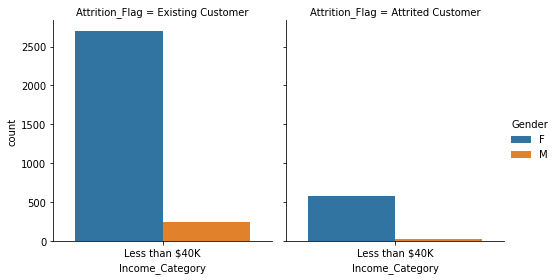

In [347]:
sns.catplot(x="Income_Category", hue="Gender",col="Attrition_Flag",
                data=dt_income_less_than_40K, kind="count",
                height=4, aspect=.9);

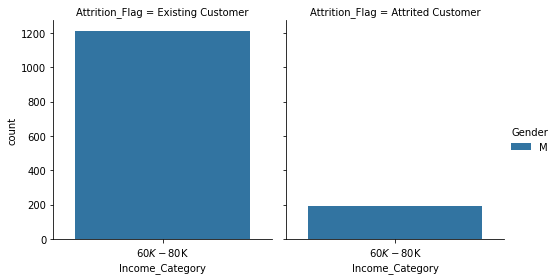

In [348]:
sns.catplot(x="Income_Category", hue="Gender",col="Attrition_Flag",
                data=dt_income_60_80, kind="count",
                height=4, aspect=.9);

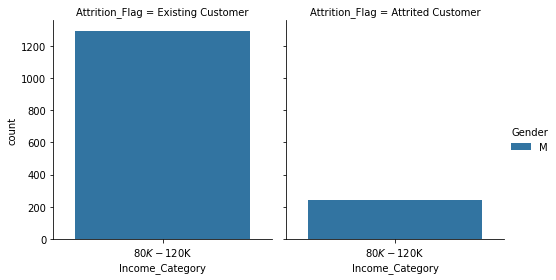

In [349]:
sns.catplot(x="Income_Category", hue="Gender",col="Attrition_Flag",
                data=dt_income_80_120, kind="count",
                height=4, aspect=.9);

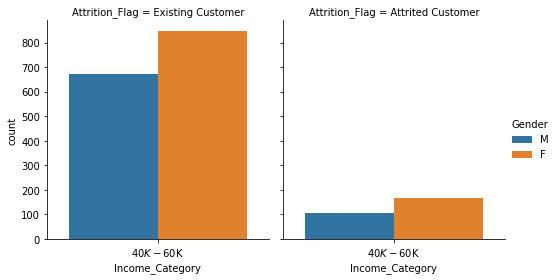

In [350]:
sns.catplot(x="Income_Category", hue="Gender",col="Attrition_Flag",
                data=dt_income_40_60, kind="count",
                height=4, aspect=.9);

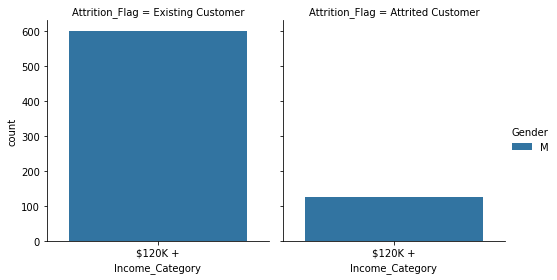

In [351]:
sns.catplot(x="Income_Category", hue="Gender",col="Attrition_Flag",
                data=dt_income_120, kind="count",
                height=4, aspect=.9);

**Findings:**
* All the income categories are in the threat of attrition.
* Majority of the credit card customers belongs to less than $40K income group (category 1) and the attrition rate is     also high for them.

* Bank must give more attention to these category.
* Category 2 (40K to 120K) : Bank must provide attractive offers for these category.
* Category 3(more than $120K): Bank must conduct promotions among these group.

* Income category with above $60K income contains on male credit card customers.

### Inference:

* The circumstances that affects the churn rates are:
  * Credit card customers inactiveness for more than 2 months.
  * Customers who have been contacted more than 3 times by the bank
  * Customers who have transaction rates below 2.5%

* Further exploration is needed as to understand why:
  * Females have more attrition rate than males
  * The increase in contact rate results in attrition
  * Low income group customers have higher tendency of attrition

## 3.Preprocessing

### 3.1.Handling of missing values

In [352]:
dt.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* It is found that there are 1519 null values within the feature "Education_Level",749 null values within "Marital_Status" and   1112 null values within the feature "Income_Category".

In [353]:
dt['Education_Level'].fillna(dt['Education_Level'].mode()[0],inplace=True)
dt['Marital_Status'].fillna(dt['Marital_Status'].mode()[0],inplace=True)
dt['Income_Category'].fillna(dt['Income_Category'].mode()[0],inplace=True)

In [354]:
dt.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### 3.2.Handling of Outliers

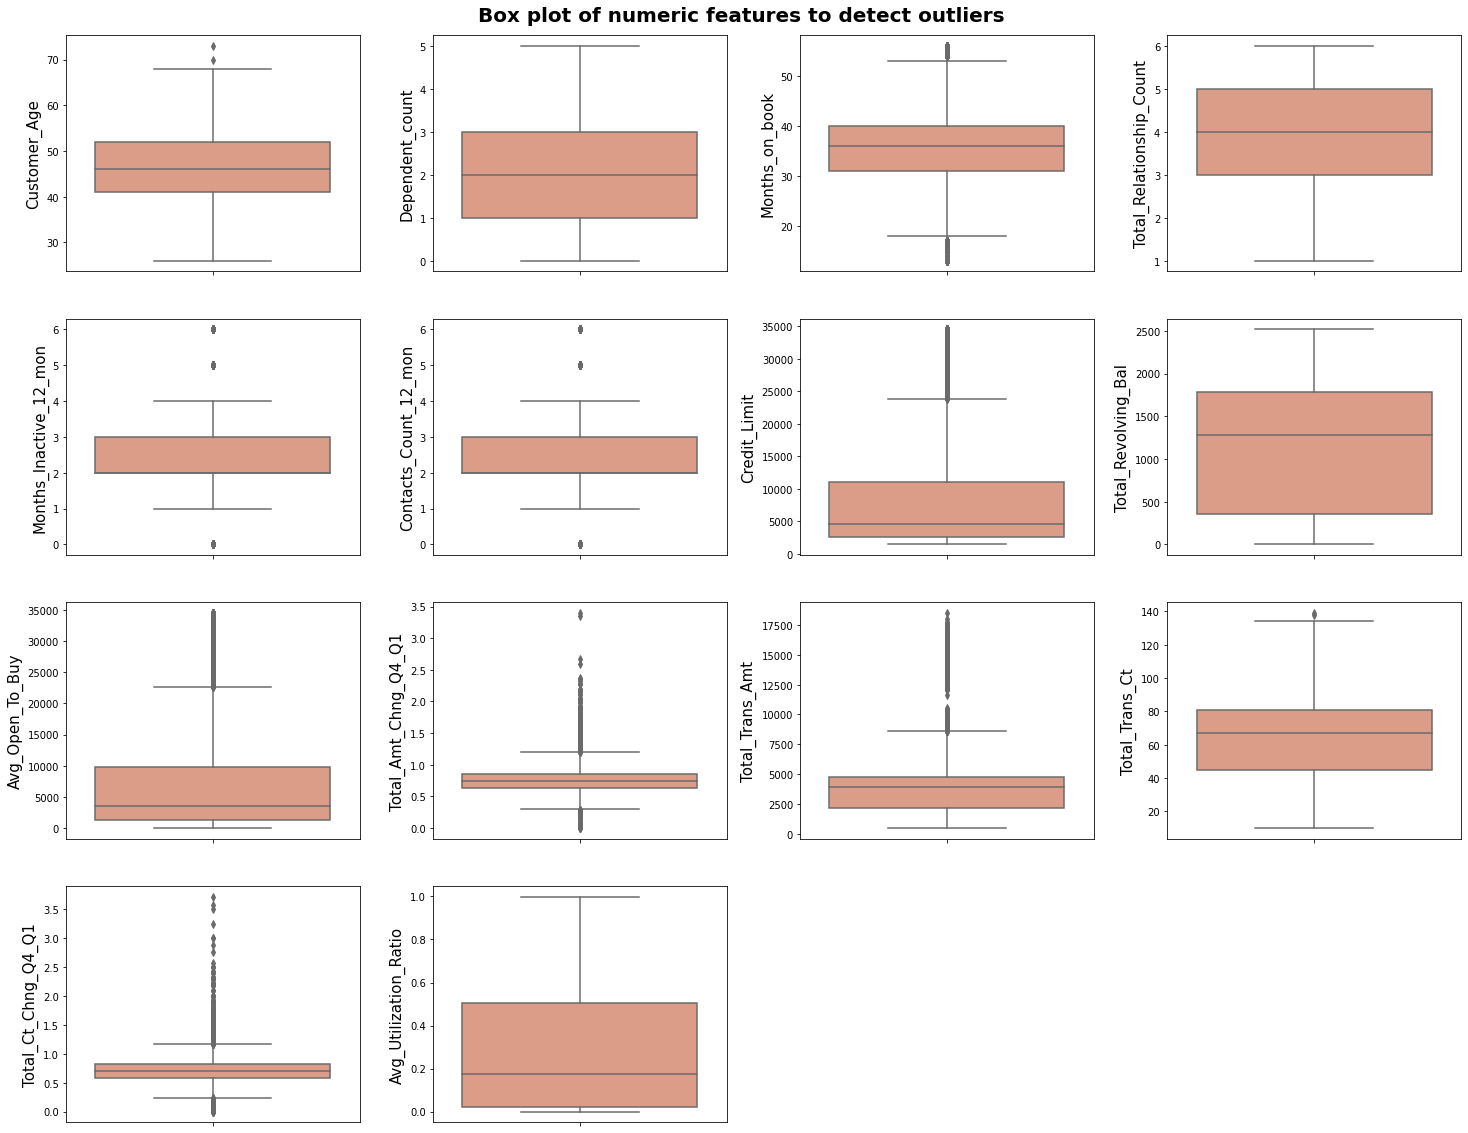

In [355]:
fig,axs=plt.subplots(4,4,figsize=(25,20))
fig.suptitle("Box plot of numeric features to detect outliers",y=0.9,fontweight="bold",fontsize=20)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.boxplot(y=dt[col],ax=ax,color="darksalmon")
    b.set_ylabel(col,fontsize=15)
    plt.subplots_adjust(wspace=.25)
fig.delaxes(axs[3,2])
fig.delaxes(axs[3,3])


In [356]:
col_outliers=dt[col_num].iloc[:,[1,3,5,6,7,9,10,11,12,13]].columns.tolist()
col_outliers

['Customer_Age',
 'Months_on_book',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [357]:
def outlier_trt(data,col):
    X=data[col].copy()
    q3=X.quantile(0.75)
    q1=X.quantile(0.25)
    iqr=q3-q1
    for idx,entry in enumerate(data[col]):
        if (entry>q3+1.5*iqr):
            data.loc[idx,col]=q3+1.5*iqr
        elif (entry<q1-1.5*iqr):
            data.loc[idx,col]=q1-1.5*iqr
    return X[(X>q3+1.5*iqr)|(X<q1-1.5*iqr)]
    
for col in col_outliers:
    outlier_trt(dt,col)

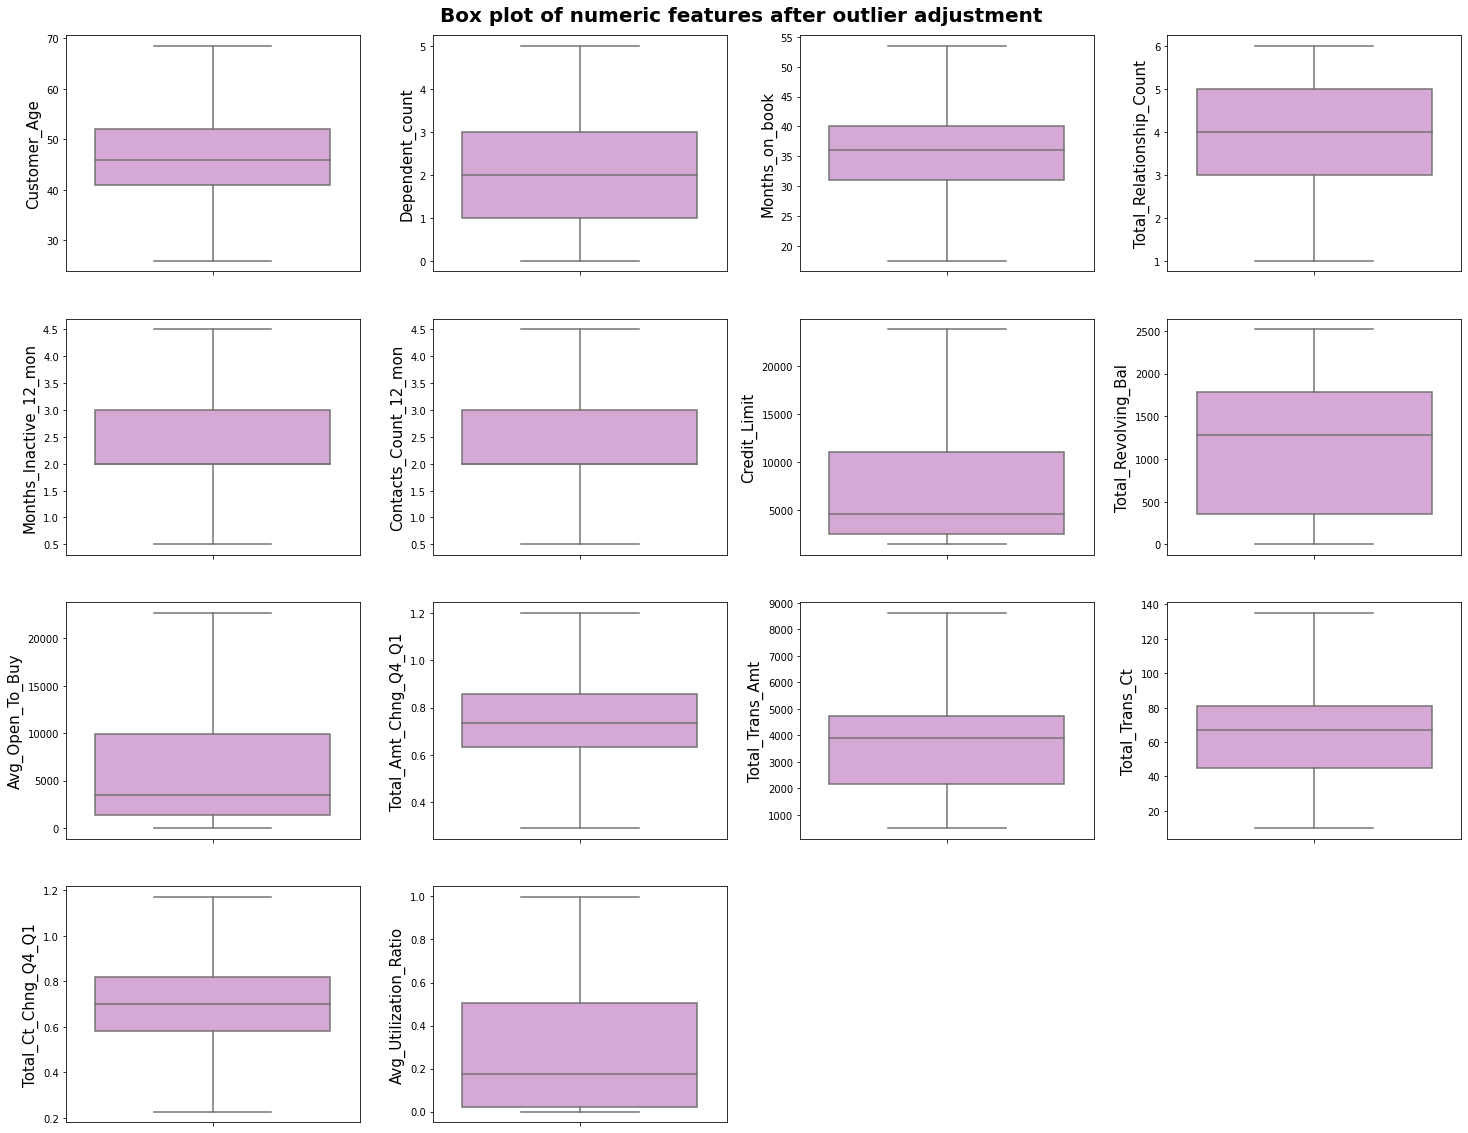

In [358]:
fig,axs=plt.subplots(4,4,figsize=(25,20))
fig.suptitle("Box plot of numeric features after outlier adjustment",y=0.9,fontweight="bold",fontsize=20)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.boxplot(y=dt[col],ax=ax,color="plum")
    b.set_ylabel(col,fontsize=15)
    plt.subplots_adjust(wspace=.25)
fig.delaxes(axs[3,2])
fig.delaxes(axs[3,3])

In [359]:
dt.shape

(10127, 21)

### 3.3.Feature Reduction

In [360]:
dt.drop(['CLIENTNUM'],axis=1,inplace=True)

* Since CLIENTNUM is a unique feature, we can drop that column

In [361]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dt['Attrition_Flag']=lb.fit_transform(dt['Attrition_Flag'])


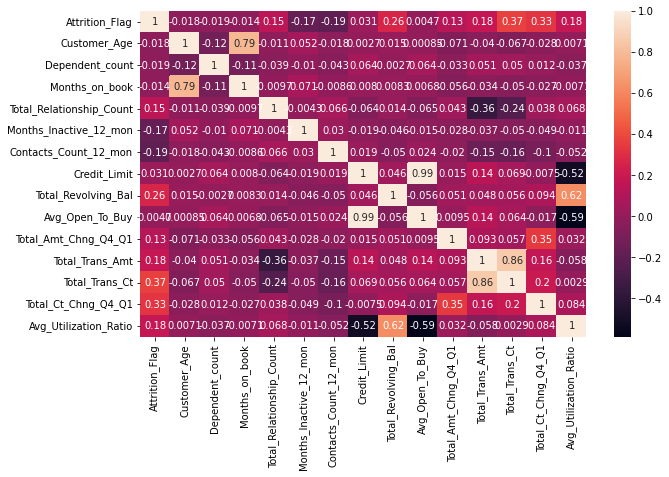

In [362]:
plt.subplots(figsize=(10,6))
sns.heatmap(dt.corr(),annot=True)
plt.show()

**Findings:**
  * Total_Trans_Amt & Total_Trans_Ct, Months_on_book & Customer_Age, Credit_Limit & Avg_Open_To_Buy, Total_Revolving_Bal & Avg_Utilization_Ratio  have high positive correlation.
  * From this we can drop Total_Trans_Amt, Months_on_book, Avg_Open_To_Buy & Avg_Utilization_Ratio since they have comparatively low correlation with target.
  



In [363]:
dt = dt.drop(['Total_Trans_Amt','Months_on_book','Avg_Open_To_Buy','Avg_Utilization_Ratio'],axis=1)

In [364]:
dt.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

In [365]:
dt.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325368,2.346203,3.812580,2.315444,2.458329,7882.309381,1162.814061,0.751387,64.858003,0.703484
std,0.367235,8.015036,1.298908,1.554408,0.930323,1.025784,7217.091225,814.987335,0.184542,23.470452,0.197203
min,0.000000,26.000000,0.000000,1.000000,0.500000,0.500000,1438.300000,0.000000,0.289000,10.000000,0.228000
25%,1.000000,41.000000,1.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,0.631000,45.000000,0.582000
50%,1.000000,46.000000,2.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,0.736000,67.000000,0.702000
75%,1.000000,52.000000,3.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,0.859000,81.000000,0.818000
max,1.000000,68.500000,5.000000,6.000000,4.500000,4.500000,23836.250000,2517.000000,1.201000,135.000000,1.172000


## 3.4.Feature Engineering

In [366]:
dt["Income_Category"].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [367]:
income_category_labels ={'Less than $40K': 'High Risk Category',"$40K - $60K":"Medium Risk Category",
"$60K - $80K": "Medium Risk Category","$80K - $120K":"Medium Risk Category","$120K +":"Low Risk Category"}  

In [368]:
dt['Risk_Category'] = dt['Income_Category'].replace(income_category_labels)

In [369]:
dt.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Risk_Category
0,1,45.0,M,3,High School,Married,$60K - $80K,Blue,5,1.0,3.0,12691.0,777,1.201,42,1.172,Medium Risk Category
1,1,49.0,F,5,Graduate,Single,Less than $40K,Blue,6,1.0,2.0,8256.0,864,1.201,33,1.172,High Risk Category
2,1,51.0,M,3,Graduate,Married,$80K - $120K,Blue,4,1.0,0.5,3418.0,0,1.201,20,1.172,Medium Risk Category
3,1,40.0,F,4,High School,Married,Less than $40K,Blue,3,4.0,1.0,3313.0,2517,1.201,20,1.172,High Risk Category
4,1,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,5,1.0,0.5,4716.0,0,1.201,28,1.172,Medium Risk Category


## 3.5. Standardisation

In [370]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
s=dt[['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon',
      'Credit_Limit','Total_Revolving_Bal','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1',
      'Total_Ct_Chng_Q4_Q1','Total_Trans_Ct']]
s=standardisation.fit_transform(s)

In [371]:
s=pd.DataFrame(s)
s.columns=['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon',
           'Credit_Limit','Total_Revolving_Bal','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1',
           'Total_Ct_Chng_Q4_Q1','Total_Trans_Ct']
s.head()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct
0,-0.165368,0.503368,0.763943,-1.414034,0.666325,-0.473422,0.528081,2.436489,2.375918,-0.973954
1,0.333718,2.043199,1.407306,-1.414034,0.051781,-0.366667,-0.446831,2.436489,2.375918,-1.357433
2,0.583262,0.503368,0.120579,-1.414034,-0.618605,-1.426858,-1.909199,2.436489,2.375918,-1.911349
3,-0.789227,1.273283,-0.522785,1.810811,-0.633155,1.661686,-1.421743,2.436489,2.375918,-1.911349
4,-0.789227,0.503368,0.763943,-1.414034,-0.438745,-1.426858,-1.909199,2.436489,2.375918,-1.570478


In [372]:
dt1=dt.drop(['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Credit_Limit',
             'Total_Revolving_Bal','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Risk_Category'],axis=1)

In [373]:
dt1.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,M,High School,Married,$60K - $80K,Blue
1,1,F,Graduate,Single,Less than $40K,Blue
2,1,M,Graduate,Married,$80K - $120K,Blue
3,1,F,High School,Married,Less than $40K,Blue
4,1,M,Uneducated,Married,$60K - $80K,Blue


In [374]:
dt1 = pd.concat([dt1,s],axis=1)
dt1.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct
0,1,M,High School,Married,$60K - $80K,Blue,-0.165368,0.503368,0.763943,-1.414034,0.666325,-0.473422,0.528081,2.436489,2.375918,-0.973954
1,1,F,Graduate,Single,Less than $40K,Blue,0.333718,2.043199,1.407306,-1.414034,0.051781,-0.366667,-0.446831,2.436489,2.375918,-1.357433
2,1,M,Graduate,Married,$80K - $120K,Blue,0.583262,0.503368,0.120579,-1.414034,-0.618605,-1.426858,-1.909199,2.436489,2.375918,-1.911349
3,1,F,High School,Married,Less than $40K,Blue,-0.789227,1.273283,-0.522785,1.810811,-0.633155,1.661686,-1.421743,2.436489,2.375918,-1.911349
4,1,M,Uneducated,Married,$60K - $80K,Blue,-0.789227,0.503368,0.763943,-1.414034,-0.438745,-1.426858,-1.909199,2.436489,2.375918,-1.570478


##3.6.Encoding

### 3.6.1.Label Encoding

In [375]:
lb = LabelEncoder()
dt1.Education_Level = lb.fit_transform(dt1.Education_Level)
dt1.Card_Category = lb.fit_transform(dt1.Card_Category)
dt1.Income_Category = lb.fit_transform(dt1.Income_Category)

### 3.6.2.One Hot Encoding

In [376]:
gender = pd.get_dummies(dt1['Gender'],drop_first=True)
Marital_stat = pd.get_dummies(dt1['Marital_Status'],drop_first=True)

In [377]:
dt1=pd.concat([dt1,gender,Marital_stat],axis=1)


In [378]:
dt1=dt1.drop(['Gender','Marital_Status'],axis=1)
dt1.head()

,Attrition_Flag,Education_Level,Income_Category,Card_Category,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,M,Married,Single
0,1,3,2,0,-0.165368,0.503368,0.763943,-1.414034,0.666325,-0.473422,0.528081,2.436489,2.375918,-0.973954,1,1,0
1,1,2,4,0,0.333718,2.043199,1.407306,-1.414034,0.051781,-0.366667,-0.446831,2.436489,2.375918,-1.357433,0,0,1
2,1,2,3,0,0.583262,0.503368,0.120579,-1.414034,-0.618605,-1.426858,-1.909199,2.436489,2.375918,-1.911349,1,1,0
3,1,3,4,0,-0.789227,1.273283,-0.522785,1.810811,-0.633155,1.661686,-1.421743,2.436489,2.375918,-1.911349,0,1,0
4,1,5,2,0,-0.789227,0.503368,0.763943,-1.414034,-0.438745,-1.426858,-1.909199,2.436489,2.375918,-1.570478,1,1,0


In [379]:
dt1.shape

(10127, 17)

In [380]:
dt1.columns

Index(['Attrition_Flag', 'Education_Level', 'Income_Category', 'Card_Category',
       'Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Total_Trans_Ct', 'M', 'Married', 'Single'],
      dtype='object')

## 3.7.Converting unbalanced data into balanced data
### Upsampling Method

In [381]:
dt1["Attrition_Flag"].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [382]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
# 1 = Existing customers, 0 = Attrited customer
df_majority = dt1[(dt1['Attrition_Flag']==1)] 
df_minority = dt1[(dt1['Attrition_Flag']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8500, # to match majority class
                                 random_state=42)  # reproducible results

In [383]:
# Combine majority class with upsampled minority class
dt1 = pd.concat([df_minority_upsampled, df_majority])

In [384]:
dt1["Attrition_Flag"].value_counts()

0    8500
1    8500
Name: Attrition_Flag, dtype: int64

In [385]:
dt1.shape

(17000, 17)

In [386]:
dt.shape

(10127, 17)

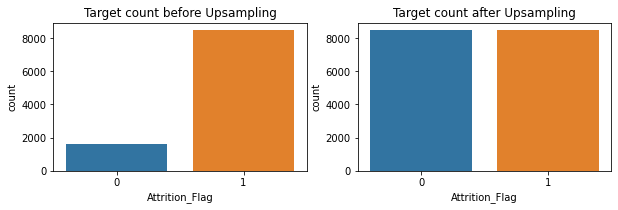

In [387]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.countplot(x='Attrition_Flag',data=dt)
plt.title("Target count before Upsampling")

plt.subplot(2,2,2)
sns.countplot(x='Attrition_Flag',data=dt1)
plt.title("Target count after Upsampling")

plt.show()

## 8. Modelling

Predicting the members who will churn with diffrent models

* Here we are taking 'Attrition_Flag' as the target. We are having a Classifcation Problem

In [388]:
dt1.columns

Index(['Attrition_Flag', 'Education_Level', 'Income_Category', 'Card_Category',
       'Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
       'Total_Trans_Ct', 'M', 'Married', 'Single'],
      dtype='object')

### Splitting of Data

In [389]:
x=dt1.drop(['Attrition_Flag'],axis=1)
y=pd.DataFrame(dt1['Attrition_Flag'])

In [390]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [391]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
# to obtain optimum K value
# so we want to create model with varied k value
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNN(n_neighbors=k,metric='minkowski') 
    classifier.fit(x_train,y_train) 
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred) 
    acc_values.append(acc) 

Text(0, 0.5, 'accuracy')

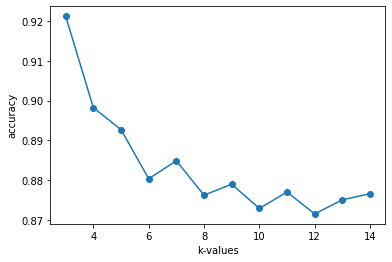

In [392]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

* K = 3 gives best accuracy

## 8.1.Modelling with Logistic Regression, KNN , Decision Tree & SVM

In [393]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
SEED=42
lr=LogisticRegression(random_state=SEED)
knn=KNN(n_neighbors=3)
dtc=DecisionTreeClassifier(random_state=SEED)
svc = SVC(kernel='rbf')
classifiers=[('LogisticRegression',lr),('K Nearest Neighbors',knn),('Decision Tree',dtc),('SVM',svc)]

In [394]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.3f}'.format(class_name,accuracy))

LogisticRegression:0.828
K Nearest Neighbors:0.921
Decision Tree:0.963
SVM:0.899


## 8.2.Modelling with Voting classifier, Random forest, Gradient Boosting & Extreme gradient boosting Model

In [395]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
SEED = 42
vc=VotingClassifier(estimators=classifiers)
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
classifiers=[('Voting Classifier',vc),('Random Forest',rf),('Gradient Boosting',gb),('Extreme Gradient Boosting',xgb)]

In [396]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.3f}'.format(class_name,accuracy))

Voting Classifier:0.933
Random Forest:0.980
Gradient Boosting:0.922
Extreme Gradient Boosting:0.917


## Model prediction Accuracy table

|Model|Accuracy_Score|
|:--|:-:|
|Logistic Regression|0.83|
|kNN|0.92|
|Decision Tree|0.96|
|Radial SVM|0.90|
|Voting Classifier|0.93|
|**Random Forest**|**0.98**|
|Gradient Boosting|0.92|
|Extreme Gradient Boosting|0.92|

### **Here the best fit for our data is Random Forest model with 98% accuracy.**

## 9.FineTuning of the Model Random Forest

## 9.1 Feature Importance

In [397]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

Total_Trans_Ct              27.706629
Total_Revolving_Bal         17.800207
Total_Ct_Chng_Q4_Q1         13.421636
Total_Amt_Chng_Q4_Q1         8.704598
Total_Relationship_Count     6.190611
Credit_Limit                 5.979563
Customer_Age                 4.603269
Months_Inactive_12_mon       4.087319
Contacts_Count_12_mon        3.254498
Dependent_count              2.010712
Education_Level              1.688302
Income_Category              1.505357
M                            1.152730
Married                      0.770686
Single                       0.649089
Card_Category                0.474793
dtype: float64

As further step we can try feature reduction & tuning of hyperparameters in the model and check if the accuracy can be increased

In [398]:
dt2 = dt1.drop(['Card_Category','Single','Married','M','Income_Category','Education_Level','Dependent_count','Contacts_Count_12_mon'],axis=1)
dt2.columns


Index(['Attrition_Flag', 'Customer_Age', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct'],
      dtype='object')

In [399]:
x1=dt2.drop(['Attrition_Flag'],axis=1)
y1=pd.DataFrame(dt2['Attrition_Flag'])

In [400]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,random_state=42,test_size=0.3)

In [401]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print ("{0:.3f}".format(accuracy))

0.978


## 9.2 Fine tuning of Hyperparameters

### 9.2.1 Grid Search CV

In [402]:
param_grid = { 
    'n_estimators': [100,200,300],
    'max_depth' : [20,25,30],
    'criterion' :['gini', 'entropy']
}

In [403]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rft = RandomForestClassifier(n_estimators=300,max_depth=25,random_state=42,criterion='gini')
rft.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=42)

In [ ]:
y_pred=rft.predict(x_test)
round(accuracy_score(y_test,y_pred),3)

0.98

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
rf.predict([[43,6,2,10388,1961,0.703,61,.649]]) # 0 = Attrited customer

array([0])

In [ ]:
rf.predict([[45,39,1,12691,777,1.335,42,1.625]]) # 1 = Existing customer

array([1])

## Result:
* Random Forest ML Algorithm gives comparitively higher accuracy with confidence interval (94, 98) percentage.

* So that we finalized our ML model for predicting the credit card customer churn using Random Forest Algorithm.